# Visualization

Here I'll do some data viz to get a better understanding of my stuff

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import numpy as np
from nltk.corpus import stopwords
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

In [2]:
df = pd.read_csv('../data/nice_data.csv').dropna(subset=['Critic_Score'])
plots = pd.read_csv('../data/fsm_set.csv').drop('Unnamed: 0', axis=1)
df.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
110,Mario Kart 8,WiiU,2014.0,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.0,82.0,9.1,1599.0,Nintendo,E
9343,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.00,0.01,0.13,49.0,22.0,7.1,7.0,Left Field Productions,E10+
15581,Speed Kings,GC,2003.0,Racing,Acclaim Entertainment,0.01,0.00,0.00,0.00,0.02,59.0,9.0,tbd,NaN,Climax Group,E
7921,Reel Fishing Paradise 3D,3DS,2011.0,Sports,Marvelous Interactive,0.12,0.00,0.06,0.01,0.19,57.0,5.0,tbd,NaN,Natsume,E
9489,Heroes of the Pacific,XB,2005.0,Simulation,Codemasters,0.10,0.03,0.00,0.00,0.13,76.0,33.0,8.2,5.0,IR Gurus Interactive Ltd.,T
8532,Goosebumps HorrorLand,Wii,2008.0,Adventure,Scholastic Inc.,0.15,0.00,0.00,0.01,0.16,37.0,4.0,3.5,8.0,SScholastic Media,E10+
5175,SAW,PS3,2009.0,Action,Konami Digital Entertainment,0.13,0.17,0.00,0.06,0.36,59.0,41.0,6.4,28.0,Zombie Studios,M
8636,Bulletstorm,PC,2011.0,Shooter,Electronic Arts,0.07,0.07,0.00,0.02,0.16,82.0,34.0,7.7,768.0,"Epic Games, People Can Fly",M
1055,The Sims 3: Late Night Expansion Pack,PC,2010.0,Simulation,Electronic Arts,0.59,0.87,0.00,0.23,1.70,74.0,17.0,5.3,77.0,The Sims Studio,T
10885,Age of Empires II: The Age of Kings,PC,1999.0,Strategy,Microsoft Game Studios,0.01,0.08,0.00,0.01,0.09,92.0,21.0,9,801.0,Ensemble Studios,T


In [3]:
plots.sample()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,plots,success
3202,LEGO Marvel Super Heroes,PC,2013.0,Action,Warner Bros. Interactive Entertainment,0.17,78.0,7.0,8.1,124.0,TT Games,E10+,galactus dispatches his servant the silver sur...,1


The first thing I'd like to see is if there is any kind of general correlation between game system and review score

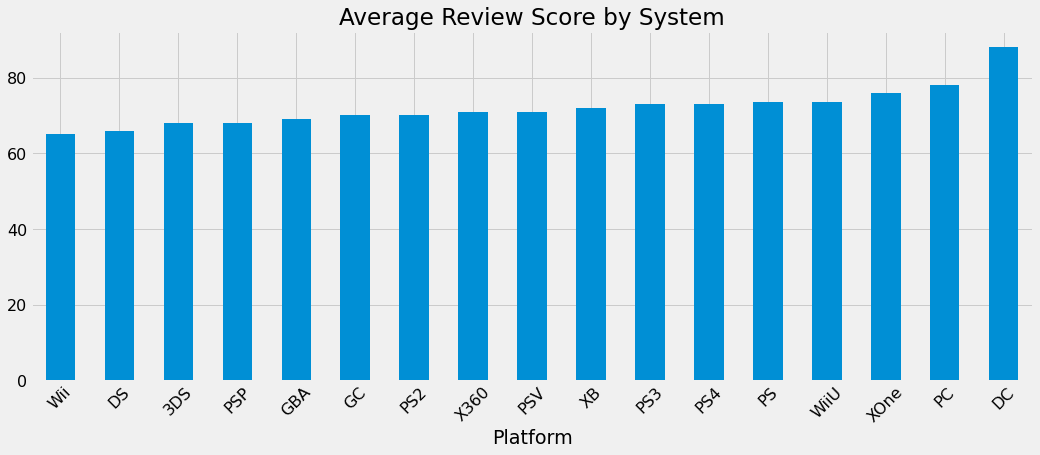

In [4]:
df.groupby('Platform')['Critic_Score'].median().sort_values().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by System');

**Alright** looks like we have some kind of correlation

in some of these cases this difference is probably not statistically significant, because a few of these systems are only representing a few games total

### Brief time-series tangent

Curious to see the review scores over time

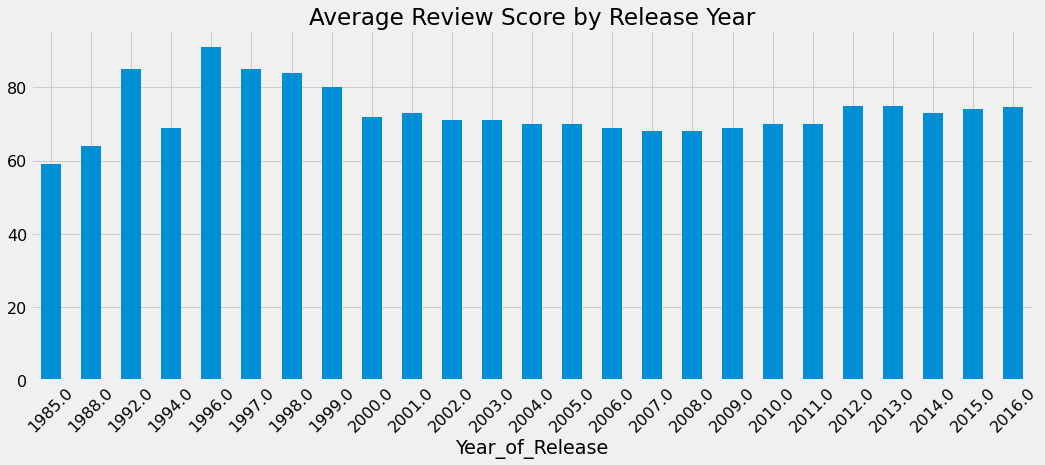

In [5]:
df.groupby('Year_of_Release')['Critic_Score'].median().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by Release Year');

In [6]:
df[df.Year_of_Release == 1996]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
153,Tekken 2,PS,1996.0,Fighting,Sony Computer Entertainment,2.26,1.89,1.36,0.23,5.74,89.0,8.0,8.9,102.0,Namco,T
203,Resident Evil,PS,1996.0,Action,Virgin Interactive,2.05,1.16,1.11,0.73,5.05,91.0,8.0,9,266.0,Capcom,M
229,Tomb Raider,PS,1996.0,Action,Eidos Interactive,2.29,1.97,0.13,0.24,4.63,91.0,13.0,8.6,147.0,Core Design Ltd.,T
903,PaRappa The Rapper,PS,1996.0,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,7.4,48.0,NanaOn-Sha,K-A
1160,Diablo,PC,1996.0,Role-Playing,Activision,0.01,1.58,0.00,0.00,1.59,94.0,12.0,8.7,850.0,Blizzard Entertainment,M
2014,Tomb Raider,PC,1996.0,Action,Eidos Interactive,0.96,0.07,0.00,0.00,1.03,86.0,18.0,8.5,3552.0,"Crystal Dynamics, Nixxes Software",M
6632,WipEout XL,PS,1996.0,Racing,Psygnosis,0.14,0.10,0.00,0.02,0.25,93.0,8.0,8.7,20.0,Psygnosis,NaN
9215,Super Puzzle Fighter II Turbo,PS,1996.0,Puzzle,Virgin Interactive,0.08,0.05,0.00,0.01,0.14,83.0,9.0,7.4,5.0,Capcom,E


In [7]:
df.Critic_Count.sum(), df.User_Count.sum()

(214498.0, 1216977.0)

In [8]:
df.Rating.value_counts()

E       2808
T       2640
M       1483
E10+    1118
RP         3
K-A        1
AO         1
Name: Rating, dtype: int64

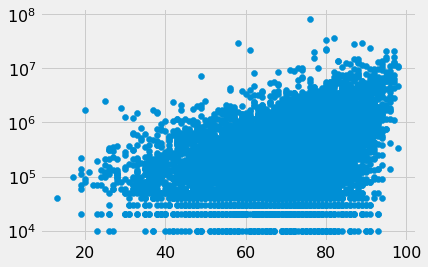

In [9]:
plt.scatter(df.Critic_Score, df.Global_Sales*1000000);
plt.yscale('log')

In [10]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.002386,0.050745,-0.026317,0.053747,0.020093,0.011411,0.223407,0.196867
NA_Sales,-0.002386,1.000000,0.840590,0.468787,0.728123,0.955705,0.240755,0.295413,0.244492
EU_Sales,0.050745,0.840590,1.000000,0.520103,0.718046,0.938926,0.220752,0.277533,0.282624
JP_Sales,-0.026317,0.468787,0.520103,1.000000,0.396889,0.613566,0.152593,0.180219,0.072427
Other_Sales,0.053747,0.728123,0.718046,0.396889,1.000000,0.805510,0.198554,0.251639,0.239171
Global_Sales,0.020093,0.955705,0.938926,0.613566,0.805510,1.000000,0.245471,0.303571,0.262935
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.196867,0.244492,0.282624,0.072427,0.239171,0.262935,0.264376,0.362334,1.000000


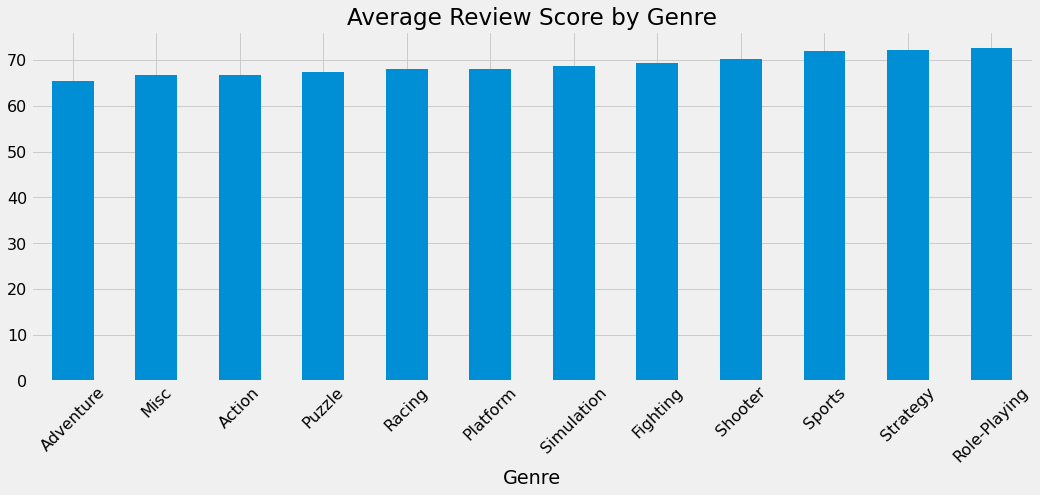

In [11]:
df.groupby('Genre')['Critic_Score'].mean().sort_values().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by Genre');

In [12]:
df['score_bins'] = pd.cut(df.Critic_Score,[0,20,30,40,50,60,70,80,90,100])
df.Global_Sales *= 1000000
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,score_bins
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82530000.0,76.0,51.0,8,322.0,Nintendo,E,"(70, 80]"
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35520000.0,82.0,73.0,8.3,709.0,Nintendo,E,"(80, 90]"
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32770000.0,80.0,73.0,8,192.0,Nintendo,E,"(70, 80]"
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29800000.0,89.0,65.0,8.5,431.0,Nintendo,E,"(80, 90]"
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28920000.0,58.0,41.0,6.6,129.0,Nintendo,E,"(50, 60]"


In [13]:
sbb = df.groupby('score_bins')['Global_Sales'].median()
sbb

score_bins
(0, 20]        90000.0
(20, 30]      110000.0
(30, 40]      100000.0
(40, 50]      130000.0
(50, 60]      160000.0
(60, 70]      190000.0
(70, 80]      300000.0
(80, 90]      620000.0
(90, 100]    1720000.0
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Median Sales by Metacritic Score Group')

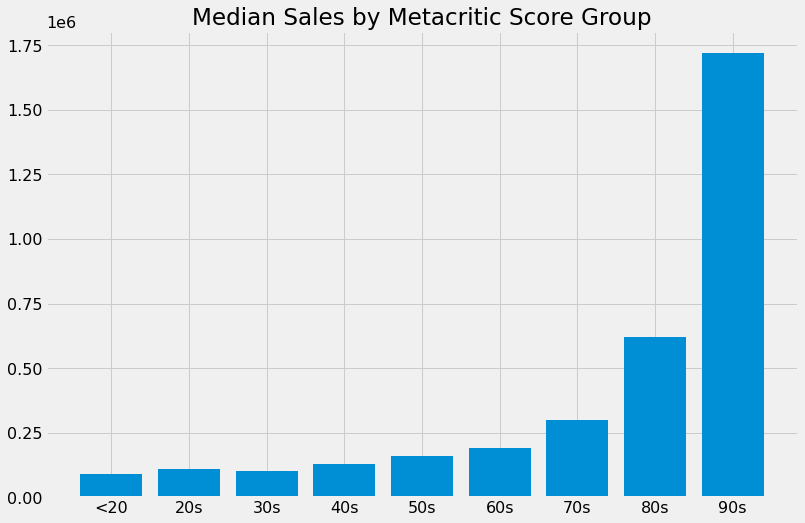

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(sbb.index.astype(str), sbb.values)
ax.set_xticklabels(('<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'))
ax.set_title('Median Sales by Metacritic Score Group')
#plt.ylim(5e4,5e6)

If you earn above a 90 on Metacritic, you are basically guaranteed some level of sales

If you don't earn above a 60 on metacritic, your maximum possible sales will be severly limited

**aside** I'm just curious what our critic count column looks like...probably should've checked this one out earlier

In [21]:
df.Critic_Count.describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

That's awesome, at minimum these critic scores are the average of 3 reviewers, with an average of 26 reviews making up one score

In [58]:
def make_word_cloud(words, image_path,
                    save_loc='../src/figures/wordcloud.png'):
    '''
    take in an image filepath and a string of words
    and produce a wordcloud image 
    also save this image to 'save_loc'
    '''
    from PIL import Image
    from wordcloud import ImageColorGenerator, WordCloud
    import numpy as np
    import string
    
    stopword_list = stopwords.words('english')
    
    char_mask = np.array(Image.open(image_path))
    image_colors = ImageColorGenerator(char_mask)
    
    long = ' '.join([entry.lower() for entry in words])
    long = ''.join([ch for ch in long if ch not in string.punctuation])
    final = ' '.join([word.strip() for word in long if word not in stopword_list])
    
    wc = WordCloud(background_color='white', max_words=200, width=400, height=400,
                  mask=char_mask, random_state=1).generate(final)
    plt.imshow(wc.recolor(color_func=image_colors))

In [59]:
make_word_cloud(plots.plots.values, '../src/figures/controller1.png')

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [69]:
words, image_path = plots.plots.values, '../src/figures/controller2.png'

In [70]:
from PIL import Image
from wordcloud import ImageColorGenerator, WordCloud
import numpy as np
import string

stopword_list = stopwords.words('english')

char_mask = np.array(Image.open(image_path))
image_colors = ImageColorGenerator(char_mask)

long = ' '.join([entry.lower() for entry in words])
long = ''.join([ch for ch in long if ch not in string.punctuation])
final = ' '.join([word.strip() for word in long.split() if word not in stopword_list])



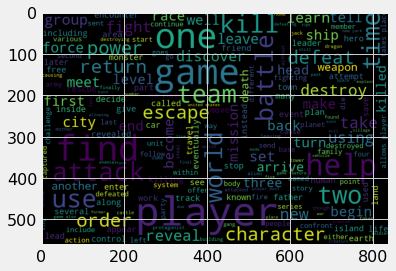

In [73]:
wc = WordCloud(max_words=200, width=400, height=400,
              mask=char_mask, random_state=1)
wc.generate(final)
plt.imshow(wc)